8994


Text(0.5, 1.0, 'Zooplankton Densities in Madison, WI Lakes Area (1990-2018)')

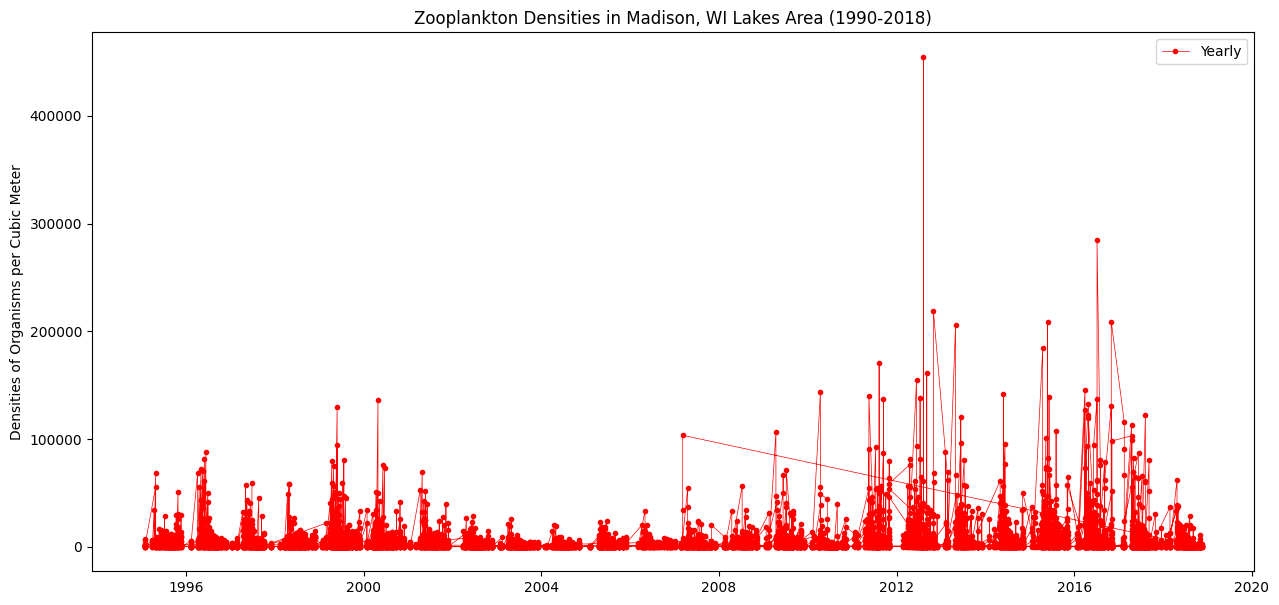

In [3]:
import pandas as pd
import numpy as np
Zooplankton = pd.read_csv('/Users/annabellemajerus/Desktop/FinalProjectData/Zooplankton/ntl90_v8.csv') 

#Add a column for density of organisms per cubic meter
Zooplankton['Densities'] = Zooplankton['density'] / Zooplankton['towdepth'] 

#Renaming sample_date to Date
Zooplankton = Zooplankton.rename(columns = {'sample_date':'Date'})

#Refining the data to only include the Date and Densities columns
Zooplankton = Zooplankton[["Date", "Densities"]]

#Removing missing data
Zooplankton = Zooplankton.dropna(subset=['Densities'])
print(len(Zooplankton))

#Date Index
Zooplankton['Date'] = pd.to_datetime(Zooplankton['Date'])
Zooplankton = Zooplankton.set_index('Date')

#Plotting the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Zooplankton.Densities, marker='.', linestyle='-', linewidth=0.5, label='Yearly', color='red')
ax.set_ylabel('Densities of Organisms per Cubic Meter')
ax.legend()
plt.title('Zooplankton Densities in Madison, WI Lakes Area (1990-2018)')



In [6]:
#ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(Zooplankton.Densities)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is less than 0.05, so the data is stationary

#KPSS Test
from statsmodels.tsa.stattools import kpss
result = kpss(Zooplankton.Densities)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is less than 0.05, so the data is not stationary

#We get conflicting results from the ADF and KPSS tests, so we will difference the data and test for stationarity again
#First, we will slice the data to a smaller time frame to make it easier to work with

ADF Statistic: -7.155096
p-value: 0.000000

KPSS Statistic: 2.926037
p-value: 0.010000


/var/folders/v8/9qr655v530d3f7s6p8t0z60c0000gn/T/ipykernel_2517/2360921883.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(Zooplankton.Densities)


Text(0.5, 1.0, 'Zooplankton Densities in Madison, WI Lakes Area (2010-2020)')

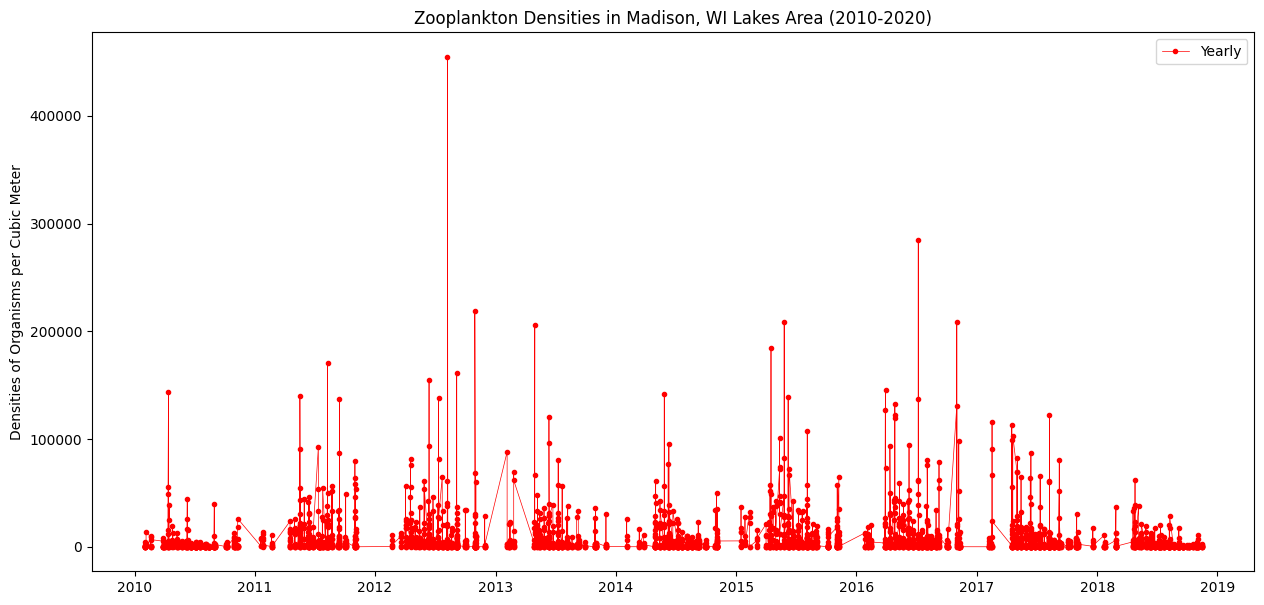

In [4]:
#Slice the data to only include data from 2010 to 2020

#Sort the DataFrame by Date
Zooplankton = Zooplankton.sort_index()

#Slicing the Data
Zooplankton = Zooplankton.loc['2010-01-01':'2020-01-01']

#Plotting the data
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Zooplankton.Densities, marker='.', linestyle='-', linewidth=0.5, label='Yearly', color='red')
ax.set_ylabel('Densities of Organisms per Cubic Meter')
ax.legend()
plt.title('Zooplankton Densities in Madison, WI Lakes Area (2010-2020)')



In [6]:
#ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(Zooplankton.Densities)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is less than 0.05, so the data is stationary

#KPSS Test
from statsmodels.tsa.stattools import kpss
result = kpss(Zooplankton.Densities)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is less than 0.05, so the data is not stationary

#We will difference the data and test for stationarity again

ADF Statistic: -11.531471
p-value: 0.000000

KPSS Statistic: 0.587329
p-value: 0.023788


ADF Statistic: -18.038439
p-value: 0.000000

KPSS Statistic: 0.026736
p-value: 0.100000


/var/folders/v8/9qr655v530d3f7s6p8t0z60c0000gn/T/ipykernel_1191/1986250427.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(Zooplankton.Densities_diff.dropna())


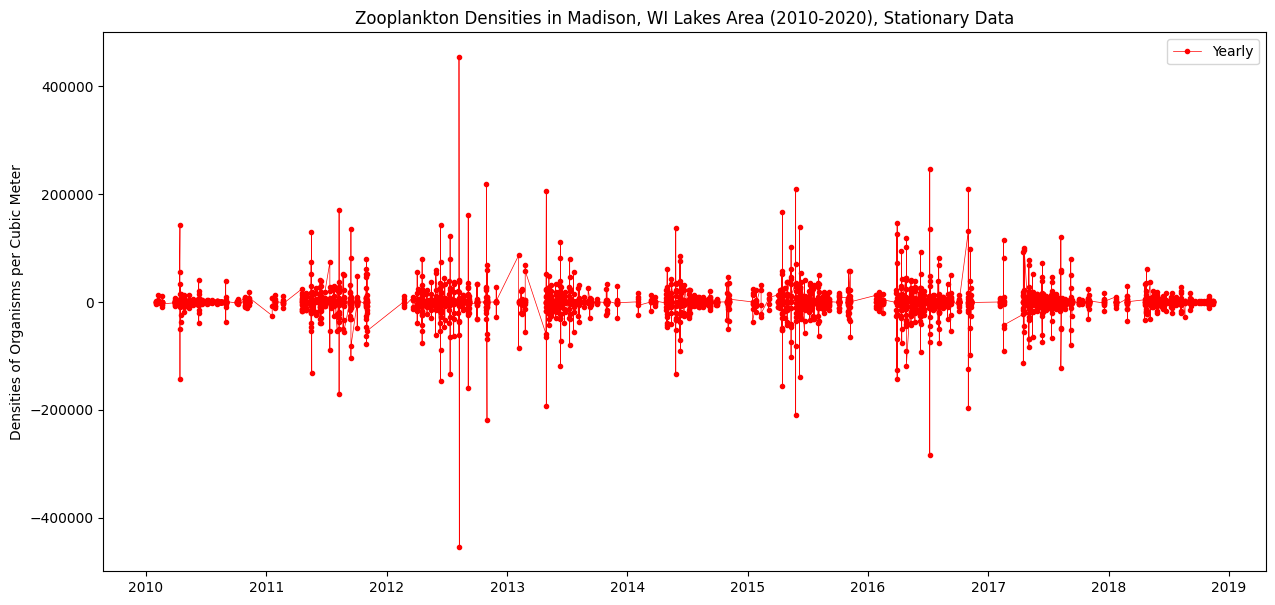

In [7]:
#Differencing the Data
Zooplankton['Densities_diff'] = Zooplankton['Densities'] - Zooplankton['Densities'].shift(1)

#Plotting the data
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(Zooplankton.Densities_diff, marker='.', linestyle='-', linewidth=0.5, label='Yearly', color='red')
ax.set_ylabel('Densities of Organisms per Cubic Meter')
ax.legend()
plt.title('Zooplankton Densities in Madison, WI Lakes Area (2010-2020), Stationary Data')

#ADF Test
result = adfuller(Zooplankton.Densities_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is less than 0.05, so the data is stationary

#KPSS Test
result = kpss(Zooplankton.Densities_diff.dropna())
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#The p-value is greater than 0.05, so the data is stationary


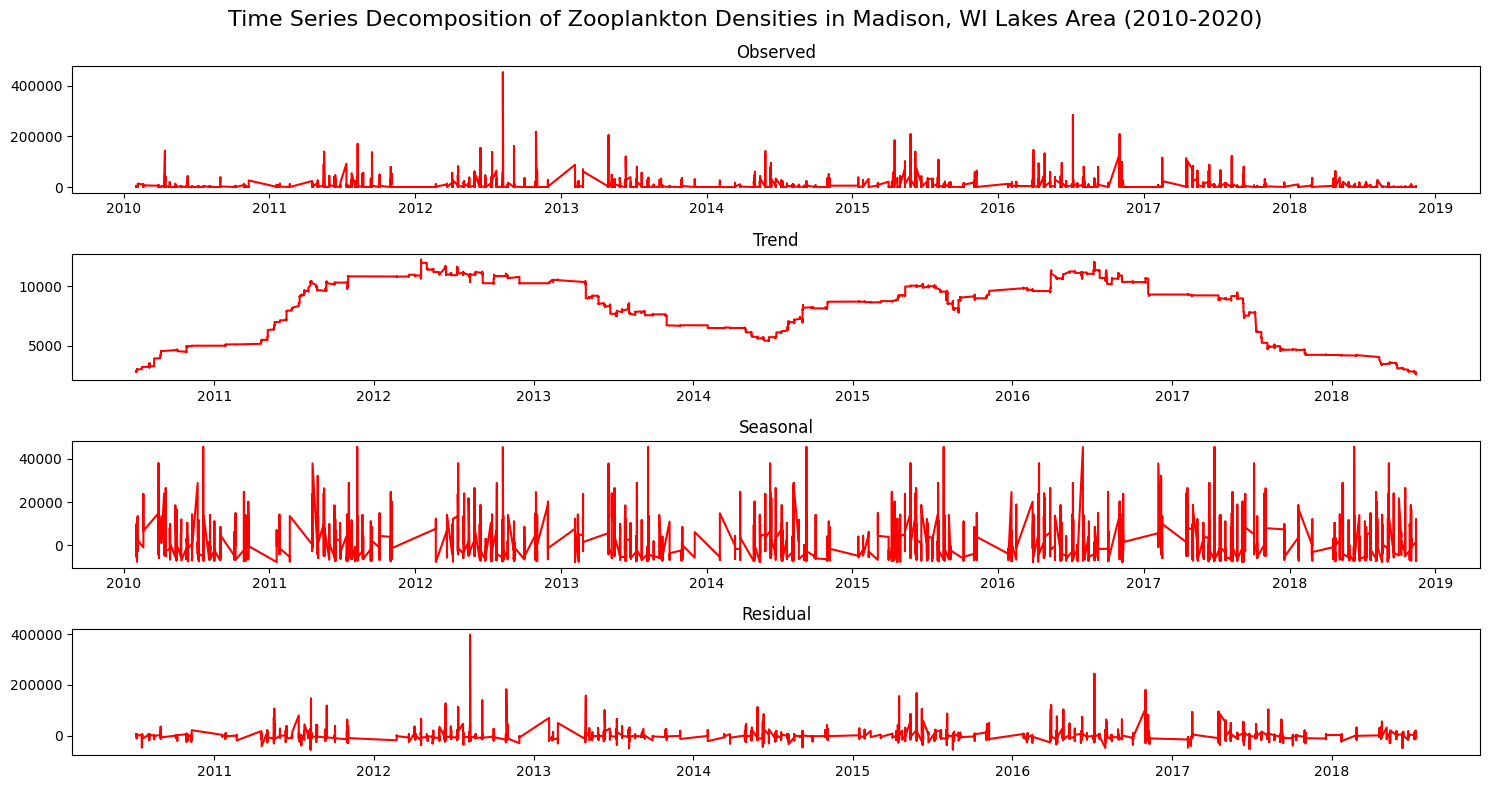

In [13]:
import statsmodels.api as sm

# Time series decomposition for sliced data
decomposition = sm.tsa.seasonal_decompose(Zooplankton.Densities, model='additive', period=365)

# Plot each component separately
plt.figure(figsize=(15, 8))
plt.suptitle('Time Series Decomposition of Zooplankton Densities in Madison, WI Lakes Area (2010-2020)', fontsize=16)  # Add title

plt.subplot(411)
plt.plot(decomposition.observed, color='red')
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, color='red')
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, color='red')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, color='red')
plt.title('Residual')

plt.tight_layout()

Text(0.5, 0.98, 'ACF and PACF Plots of Zooplankton Densities in Madison, WI Lakes Area (2010-2020)')

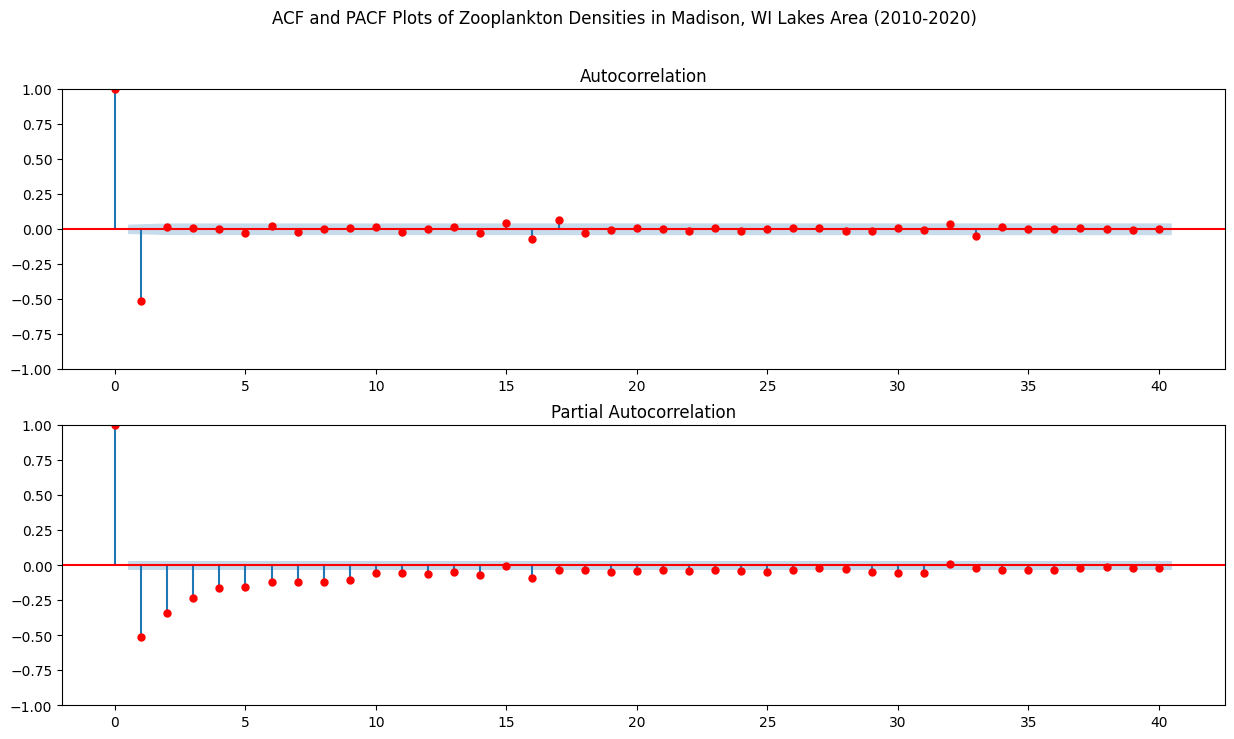

In [17]:
#The data has a clear seasonal component

#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
plot_acf(Zooplankton.Densities_diff.dropna(), lags=40, ax=ax[0], color='red')
plot_pacf(Zooplankton.Densities_diff.dropna(), lags=40, ax=ax[1], color='red')
plt.suptitle('ACF and PACF Plots of Zooplankton Densities in Madison, WI Lakes Area (2010-2020)')


#The ACF plot shows a significant spike at lag 1, and the PACF plot shows a significant spike at lag 1 as well

